# Lab 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Retail_sales_of_electricity_United_States_monthly.csv', skiprows=4,index_col=0)
df.index = pd.to_datetime(df.index)
print(df.isnull().sum())
df = df.dropna()
print('********************************')
print(df.isnull().sum())

# Sort the DataFrame by date index
df = df.sort_index()

# Check for duplicate index values and keep the first occurrence
df = df.loc[~df.index.duplicated(keep='first')]
df = df.asfreq('MS')
# print(df.head())

all sectors million kilowatthours    10
residential million kilowatthours    10
commercial million kilowatthours     10
industrial million kilowatthours     10
dtype: int64
********************************
all sectors million kilowatthours    0
residential million kilowatthours    0
commercial million kilowatthours     0
industrial million kilowatthours     0
dtype: int64


C:\Users\Domin\AppData\Local\Temp\ipykernel_16584\1333890328.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


The problem with data is that the index datetime column is inconsistent, also the format is unusual.

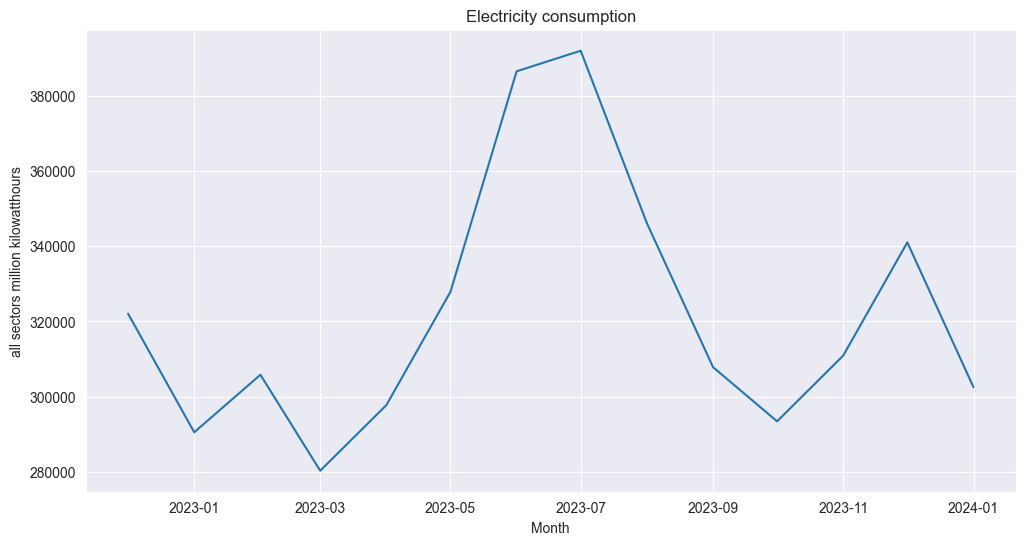

In [2]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='all sectors million kilowatthours')
plt.title('Electricity consumption')
plt.show()

C:\Users\Domin\PycharmProjects\time_series_lab_7\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


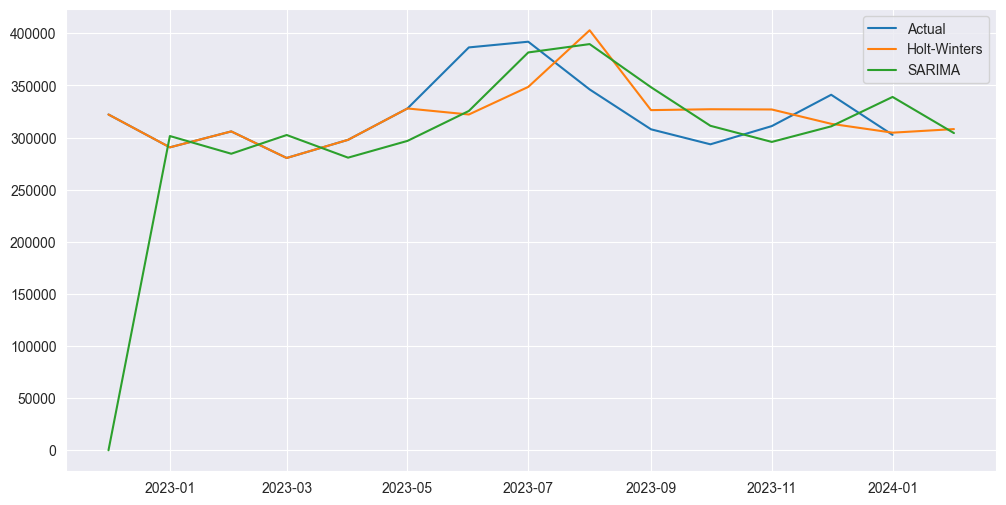

In [3]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt

data = df['all sectors million kilowatthours']

# Fit the Holt-Winters model
model_hw = ExponentialSmoothing(data, seasonal='add', seasonal_periods=6)
model_hw_fit = model_hw.fit()
pred_hw = model_hw_fit.predict(start=0, end=len(data))

# Fit the SARIMA model
model_sarima = SARIMAX(data, order=(1, 1, 1))
model_sarima_fit = model_sarima.fit(disp=False)
pred_sarima = model_sarima_fit.predict(start=0, end=len(data))

plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual')
plt.plot(pred_hw, label='Holt-Winters')
plt.plot(pred_sarima, label='SARIMA')
plt.legend(loc='best')
plt.show()


Now using sklearn I will provide basic metrics about errors in my models. I will look for lower values of  mean absolute error or mean squared error to determine better fit


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


pred_hw = pred_hw[:-1]
pred_sarima = pred_sarima[:-1]
mae_hw = mean_absolute_error(data, pred_hw)
mse_hw = mean_squared_error(data, pred_hw)
rmse_hw = sqrt(mse_hw)

mae_sarima = mean_absolute_error(data, pred_sarima)
mse_sarima = mean_squared_error(data, pred_sarima)
rmse_sarima = sqrt(mse_sarima)

print("Holt-Winters model errors:")
print(f"MAE: {mae_hw}")
print(f"MSE: {mse_hw}")
print(f"RMSE: {rmse_hw}")

print("\nSARIMA model errors:")
print(f"MAE: {mae_sarima}")
print(f"MSE: {mse_sarima}")
print(f"RMSE: {rmse_sarima}")

Holt-Winters model errors:
MAE: 18743.911946254364
MSE: 838967169.1309682
RMSE: 28964.929986640193

SARIMA model errors:
MAE: 48522.79254388621
MSE: 8299338350.439275
RMSE: 91100.70444535144


In [5]:
import pandas as pd

error_metrics = {
    'Model': ['Holt-Winters', 'SARIMA'],
    'MAE': [mae_hw, mae_sarima],
    'MSE': [mse_hw, mse_sarima],
    'RMSE': [rmse_hw, rmse_sarima]
}

df_errors = pd.DataFrame(error_metrics)

print(df_errors)

          Model           MAE           MSE          RMSE
0  Holt-Winters  18743.911946  8.389672e+08  28964.929987
1        SARIMA  48522.792544  8.299338e+09  91100.704445


Based on those metrics we can suspect that Holt Winters method was a better fit to this dataset